# KMean Clustering Tutorial With Python 
@Author: Zoumana KEITA

### Import Libraries

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd

### Read the data

In [3]:
customer_df = pd.read_csv("./data/Mall_Customers.csv")
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [10]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Observation**: There is no missing values in the columns.

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Spending Score (1-100)')

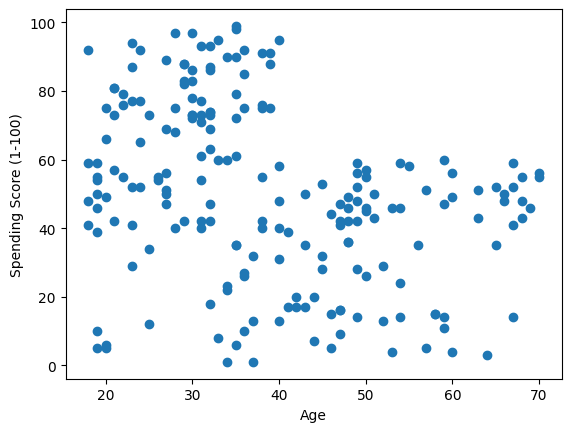

In [48]:
plt.scatter(customer_df["Age"], 
            customer_df["Spending Score (1-100)"])

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

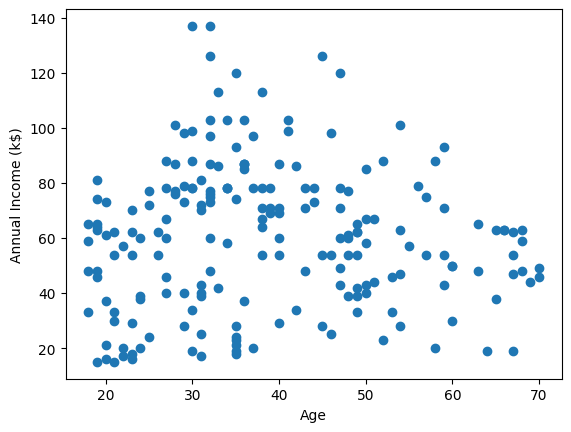

In [49]:
plt.scatter(customer_df["Age"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

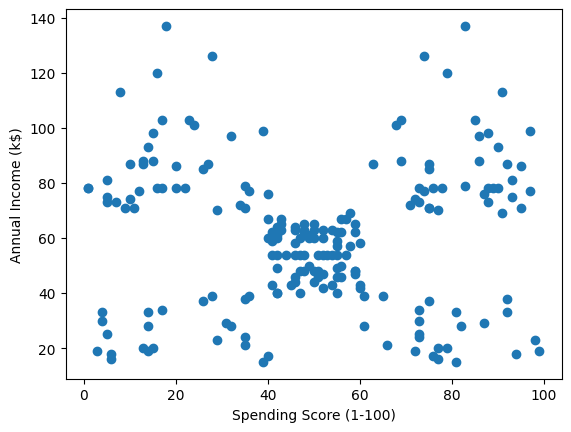

In [50]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

### Choose relevant columns

In [11]:
relevant_cols = ["Age", "Annual Income (k$)", 
                 "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

### Data Transformation

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)

### Determine the best number of cluster

In [33]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values


def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [29]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

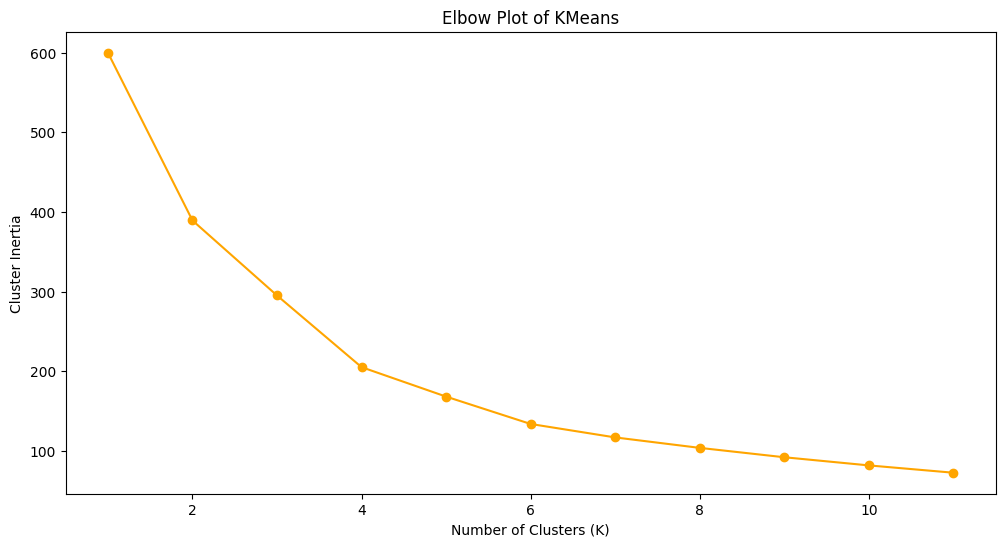

In [34]:
generate_elbow_plot(clusters_centers, k_values)

### Create the final KMeans model

In [43]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [44]:
customer_df["clusters"] = kmeans_model.labels_

In [45]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,4
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,4


### Visualize the clusters

Text(0, 0.5, 'Annual Income')

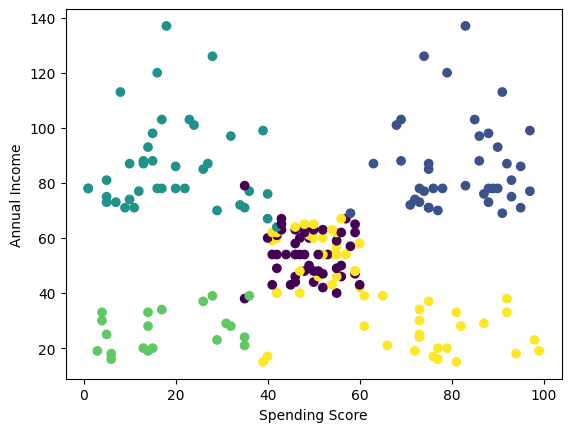

In [47]:
plt.scatter(customer_df["Spending Score (1-100)"], 
            customer_df["Annual Income (k$)"], 
            c = customer_df["clusters"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")